In [69]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [70]:
df = pd.read_csv("data/train.csv")

In [71]:
df.columns

Index(['id', 'titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad',
       'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'fecha',
       'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'precio'],
      dtype='object')

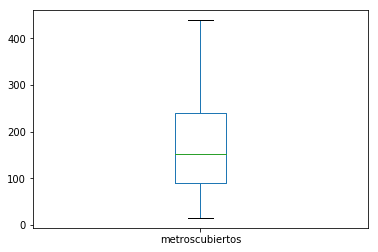

In [72]:
df.metroscubiertos.plot(kind = 'box')

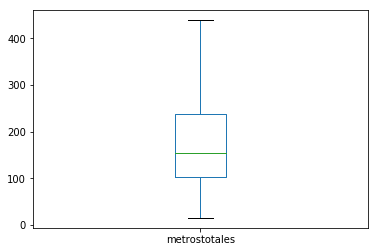

In [73]:
df.metrostotales.plot(kind = 'box')

In [74]:
df['precio_del_metro_cuadrado'] = df.precio / df.metrostotales

In [75]:
df.provincia.value_counts()

Distrito Federal         58790
Edo. de México           41607
Jalisco                  21238
Querétaro                16988
Nuevo León               15324
Puebla                   10421
San luis Potosí           8447
Yucatán                   7928
Morelos                   7337
Veracruz                  5762
Quintana Roo              4756
Chihuahua                 4590
Coahuila                  3695
Baja California Norte     3220
Sonora                    2988
Guanajuato                2860
Guerrero                  2678
Hidalgo                   2521
Michoacán                 2471
Tamaulipas                2303
Durango                   2275
Sinaloa                   1806
Aguascalientes            1753
Baja California Sur       1700
Nayarit                   1352
Chiapas                   1126
Colima                    1008
Tabasco                    994
Tlaxcala                   839
Oaxaca                     711
Campeche                   263
Zacatecas                   94
Name: pr

In [79]:
df.provincia = df.provincia.map(lambda x :  'Edo. de México'if x == 'Distrito Federal' else x)
df.provincia.value_counts()

Edo. de México           100397
Jalisco                   21238
Querétaro                 16988
Nuevo León                15324
Puebla                    10421
San luis Potosí            8447
Yucatán                    7928
Morelos                    7337
Veracruz                   5762
Quintana Roo               4756
Chihuahua                  4590
Coahuila                   3695
Baja California Norte      3220
Sonora                     2988
Guanajuato                 2860
Guerrero                   2678
Hidalgo                    2521
Michoacán                  2471
Tamaulipas                 2303
Durango                    2275
Sinaloa                    1806
Aguascalientes             1753
Baja California Sur        1700
Nayarit                    1352
Chiapas                    1126
Colima                     1008
Tabasco                     994
Tlaxcala                    839
Oaxaca                      711
Campeche                    263
Zacatecas                    94
Name: pr

In [82]:
df\
.loc[:,['provincia','precio_del_metro_cuadrado']]\
.groupby('provincia')\
.mean()\
.sort_values('precio_del_metro_cuadrado',ascending = False)

,precio_del_metro_cuadrado
provincia,
Edo. de México,19413.001051
Guerrero,14678.291470
Jalisco,13570.913738
Tabasco,13366.246230
Nuevo León,13197.894574
Puebla,12935.559997
Quintana Roo,12673.585135
Chiapas,11020.039292
Veracruz,10858.965150


In [83]:
### analisis aparte... por distrito y año para ver la inflacion promedio de estos.

In [85]:
df['fecha'] = pd.to_datetime(df['fecha'])

In [91]:
df['anio'] = df.fecha.dt.year

In [93]:
df.groupby(['anio','provincia']).size()

anio  provincia            
2012  Aguascalientes             177
      Baja California Norte      301
      Baja California Sur        239
      Campeche                    48
      Chiapas                    162
      Chihuahua                  254
      Coahuila                   483
      Colima                     183
      Durango                    192
      Edo. de México           10504
      Guanajuato                 674
      Guerrero                   376
      Hidalgo                    322
      Jalisco                    991
      Michoacán                  322
      Morelos                   1124
      Nayarit                    102
      Nuevo León                 840
      Oaxaca                     123
      Puebla                     870
      Querétaro                 1412
      Quintana Roo               569
      San luis Potosí            587
      Sinaloa                    142
      Sonora                     295
      Tabasco                    160
      Tama